In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

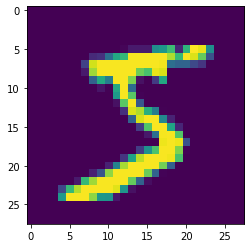

In [4]:
plt.imshow(X_train[0])

In [5]:
X_train=X_train/255
X_test=X_test/255

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [7]:
encoder=Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation='relu'))
encoder.add(Dense(200,activation='relu'))
encoder.add(Dense(100,activation='relu'))
encoder.add(Dense(50,activation='relu'))
encoder.add(Dense(25,activation='relu'))

In [8]:
decoder=Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(400,activation='relu'))
decoder.add(Dense(784,activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [9]:
autoencoder=Sequential([encoder,decoder])

In [10]:
autoencoder.compile(loss='binary_crossentropy',optimizer=SGD(lr=1.5),metrics=['accuracy'])

In [11]:
autoencoder.fit(X_train,X_train,epochs=10,validation_data=(X_test,X_test))

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2550 - accuracy: 0.0796 - val_loss: 0.2185 - val_accuracy: 0.1215
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2002 - accuracy: 0.1447 - val_loss: 0.1785 - val_accuracy: 0.1765
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1691 - accuracy: 0.1865 - val_loss: 0.1569 - val_accuracy: 0.2001
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1521 - accuracy: 0.2085 - val_loss: 0.1442 - val_accuracy: 0.2151
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1442 - accuracy: 0.2200 - val_loss: 0.1397 - val_accuracy: 0.2282
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1392 - accuracy: 0.2272 - val_loss: 0.1358 - val_accuracy: 0.2312
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1336 - accuracy: 0.2331 - val_loss: 0.1282 -

In [12]:
passed_image=autoencoder.predict(X_test[:10])

original image


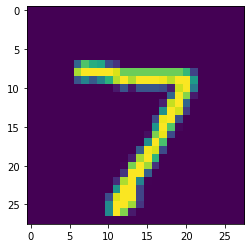

outencoder image


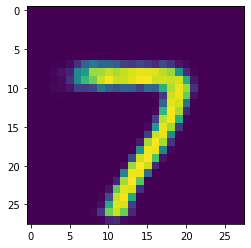

In [13]:
n=0
print('original image')
plt.imshow(X_test[n])
plt.show()
print('outencoder image')
plt.imshow(passed_image[n])